In [1]:
from hepmc.core.proposals import Gaussian
from hepmc import surrogate
from hepmc.core.density import Density
from hepmc.core import densities
from hepmc.core.hamiltonian.hmc import HamiltonianUpdate
from hepmc.core.hamiltonian.spherical_hmc import StaticSphericalHMC
from hepmc.core.hamiltonian.wall_hmc import WallHMC
from hepmc.core.sampling import Sample
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
class Exponential(Density):
    def __init__(self):
        super().__init__(2, False)
        
    def pdf(self, xs):
        xs = np.atleast_2d(xs)
        return np.exp(-6*xs[:, 0])
        
    def pot(self, xs):
        xs = np.atleast_2d(xs)
        return 6*xs[:, 0]
    
    def pot_gradient(self, xs):
        xs = np.atleast_2d(xs)
        return np.broadcast_to([6, 0], xs.shape)

In [3]:
target = Exponential()

In [4]:
xvals = np.random.random((10000, 2))
xvals_df = pd.DataFrame(xvals)
fvals = target.pdf(xvals)

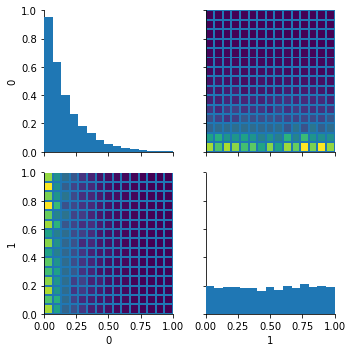

In [5]:
g = sns.PairGrid(xvals_df)
g = g.map_diag(plt.hist, weights=fvals, bins=15)
g = g.map_offdiag(plt.hist2d, weights=fvals, bins=15)

In [12]:
start = np.random.random(2)
print('start:', start)
print('pdf:', target.pdf(start))
print('pot:', target.pot(start))
print('pot_grad:', target.pot_gradient(start))
sampler = StaticSphericalHMC(target, .01, .01, 5, 5)
start = sampler.sample(10000, start).data[-1] # warmup
%time hmc_sample = sampler.sample(50000, start)

start: [0.36339528 0.60983552]
pdf: [0.11299953]
pot: [2.18037166]
pot_grad: [[6 0]]
Event 1	(batch acceptance rate: 1.000000)
Event 2	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 3	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 4	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 5	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 6	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 7	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 8	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 9	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 10	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 20	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 30	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 40	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 50	(batch acceptance rate: 0.980000)	max sequence length: 2
Event 60	(batch accepta

In [13]:
hmc_sample_df = pd.DataFrame(hmc_sample.data)

In [ ]:
np.partition(hmc_sample.weights, -50)[-50:]

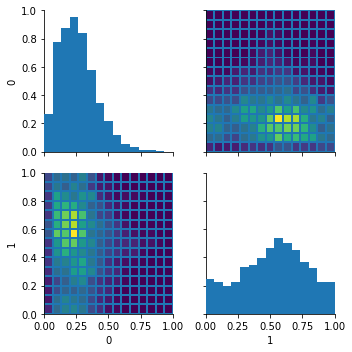

In [15]:
k = sns.PairGrid(hmc_sample_df)
k = k.map_diag(plt.hist, bins=15, weights=hmc_sample.weights, range=(0, 1))
k = k.map_offdiag(plt.hist2d, bins=15, weights=hmc_sample.weights, range=[[0, 1], [0, 1]])

In [16]:
start = np.random.random(2)
print('start:', start)
print('pdf:', target.pdf(start))
print('pot:', target.pot(start))
print('pot_grad:', target.pot_gradient(start))
sampler = WallHMC(target, .2, .2, 5, 5)
start = sampler.sample(5000, start).data[-1] # warmup
%time wallhmc_sample = sampler.sample(10000, start)

start: [0.24064857 0.61735743]
pdf: [0.23600757]
pot: [1.44389141]
pot_grad: [[6 0]]
Event 1	(batch acceptance rate: 1.000000)
Event 2	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 3	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 4	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 5	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 6	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 7	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 8	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 9	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 10	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 20	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 30	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 40	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 50	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 60	(batch accepta

In [17]:
wallhmc_sample_df = pd.DataFrame(wallhmc_sample.data)

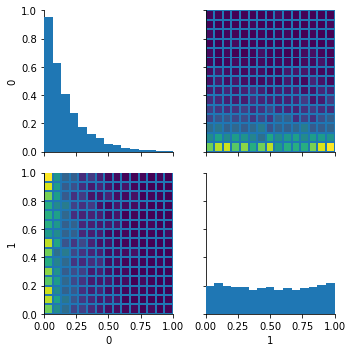

In [18]:
l = sns.PairGrid(wallhmc_sample_df)
l = l.map_diag(plt.hist, bins=15, range=(0, 1))
l = l.map_offdiag(plt.hist2d, bins=15, range=[[0, 1], [0, 1]])